In [1]:
import pygmo as pg
import numpy as np
from problem import SignalProcessingParams
import matplotlib.pyplot as plt
import pickle

In [11]:
for gn in range(1,3):
    params = SignalProcessingParams(group_number=gn)

    prob = pg.problem(params)

    # Self-adaptive Differential Evolution
    algo = pg.algorithm(pg.sade(gen=1000, variant=1, variant_adptv=1, xtol=1e-8))
    algo.set_verbosity(1)
    pop = pg.population(prob, size=50)
    pop = algo.evolve(pop)
        
    # Set the file name to save the algorithm and population object
    algo_filename = f'algo{gn}.pkl'
    pop_filename = f'pop{gn}.pkl'

    # Save the algorithm and population object to file using pickle
    with open(algo_filename, 'wb') as a:
        pickle.dump(algo, a)
    with open(pop_filename, 'wb') as p:
        pickle.dump(pop, p)

In [4]:
params = SignalProcessingParams(group_number=1)

prob = pg.problem(params)

# Set the file name to load the algorithm and population object from
algo1_filename = 'algo1.pkl'
pop1_filename = 'pop1.pkl'

# Load the algorithm and population object from file using pickle
with open(algo1_filename, 'rb') as a:
    algo = pickle.load(a)
with open(pop1_filename, 'rb') as p:
    pop = pickle.load(p)

print(1-pop.champion_f)

[0.9538316]


In [2]:
params = SignalProcessingParams(group_number=2)

prob = pg.problem(params)

# Set the file name to load the algorithm and population object from
algo2_filename = 'algo2.pkl'
pop2_filename = 'pop2.pkl'

# Load the algorithm and population object from file using pickle
with open(algo2_filename, 'rb') as a:
    algo = pickle.load(a)
with open(pop2_filename, 'rb') as p:
    pop = pickle.load(p)
    
print(1-pop.champion_f)

[0.95492589]


In [7]:
import pygmo as pg
import numpy as np
from problem import SignalProcessingParams
import pickle

for gn in range(1,3):    
    params = SignalProcessingParams(group_number=gn)

    prob = pg.problem(params)

    pop_filename = f'pop{gn}.pkl'
    with open(pop_filename, 'rb') as p:
        pop = pickle.load(p)

    print(f"Group number =",gn)
    for i in range(0, 11):
        testx = np.copy(pop.champion_x)
        results = []
        
        if (i < 9):
            testx[i] = 0
            null_corr = (1-prob.fitness(testx))*100
            for j in range(0, 51):
                testx[i] = j/10
                results.append((i, j/10, prob.fitness(testx)))
        elif (i == 9):
            testx[i] = 0
            null_corr = (1-prob.fitness(testx))*100
            for j in np.arange(0, 0.01, 0.0001):
                testx[i] = j
                results.append((i, j, prob.fitness(testx)))
        elif (i == 10):
            for j in range(1, 501):
                testx[i] = j
                results.append((i, j, prob.fitness(testx)))
            
        results_sorted = sorted(results, key=lambda x: x[2])[:30]
        #print("Top 5 smallest champion fitness values:")
        min = results_sorted[i][1]
        max = results_sorted[i][1]
        for r in results_sorted:
            if r[1] < min:
                min = r[1]
            if r[1] > max:
                max = r[1]
                
        if (i < 9): 
            print(f"Freq = {params.optim_ind[i]*2} Hz: Range of 30 best = {min} - {max}, Best corr = {float((1-results_sorted[0][2])*100):.3f}% at value of = {results_sorted[0][1]}, Diff between best corr and corr at 0 = {float((1-results_sorted[0][2])*100-null_corr):.3f}%") 
        elif (i == 9):
            print(f"Decay rate: Range of 30 best = {min} - {float(max):.4f}, Best corr = {float((1-results_sorted[0][2])*100):.3f}% at value of = {results_sorted[0][1]}, Diff between best corr and corr at 0 = {float((1-results_sorted[0][2])*100-null_corr):.3f}%") 
        elif (i == 10):
            print(f"Window size: Range = {min} - {max}, Best corr = {float((1-results_sorted[0][2])*100):.3f}% at value of = {results_sorted[0][1]}") 

Group number = 1
Freq = 2 Hz: Range of 30 best = 0.0 - 2.9, Best corr = 95.383% at value of = 0.0, Diff between best corr and corr at 0 = 0.000%
Freq = 4 Hz: Range of 30 best = 0.0 - 2.9, Best corr = 95.388% at value of = 0.2, Diff between best corr and corr at 0 = 0.005%
Freq = 50 Hz: Range of 30 best = 0.0 - 2.9, Best corr = 95.383% at value of = 0.3, Diff between best corr and corr at 0 = 0.021%
Freq = 120 Hz: Range of 30 best = 0.0 - 2.9, Best corr = 95.383% at value of = 1.7, Diff between best corr and corr at 0 = 0.016%
Freq = 124 Hz: Range of 30 best = 0.0 - 2.9, Best corr = 95.383% at value of = 1.8, Diff between best corr and corr at 0 = 0.023%
Freq = 136 Hz: Range of 30 best = 0.5 - 3.4, Best corr = 95.383% at value of = 2.3, Diff between best corr and corr at 0 = 0.022%
Freq = 176 Hz: Range of 30 best = 2.1 - 5.0, Best corr = 95.383% at value of = 4.8, Diff between best corr and corr at 0 = 0.037%
Freq = 414 Hz: Range of 30 best = 0.0 - 5.0, Best corr = 95.383% at value of =

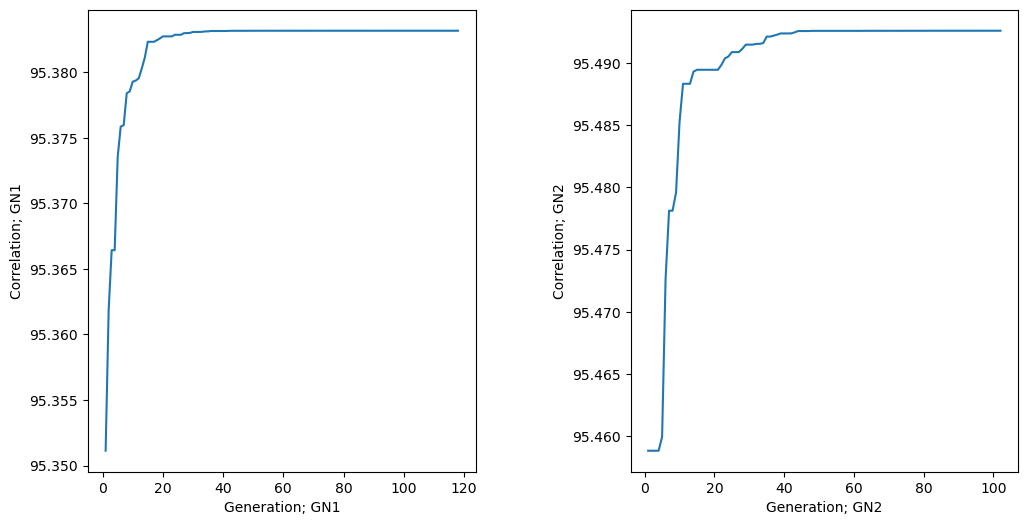

In [15]:
import pygmo as pg
from problem import SignalProcessingParams
import pickle
import matplotlib.pyplot as plt

for gn in range(1,3):    
    params = SignalProcessingParams(group_number=gn)

    prob = pg.problem(params)
    
    algo_filename = f'algo{gn}.pkl'
    with open(algo_filename, 'rb') as a:
        algo = pickle.load(a)
        
    sade = algo.extract(pg.sade)
    logbook = sade.get_log()

    # Extract the champion fitness values and the corresponding generation number
    generations = [entry[0] for entry in logbook]
    champion_fitness = [entry[2] for entry in logbook]

    # Create the first subplot on the left
    plt.subplot(1, 2, gn)
    plt.plot(generations, [(1-i)*100 for i in champion_fitness])
    plt.xlabel(f'Generation; GN{gn}')
    plt.ylabel(f'Correlation; GN{gn}')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Set the figure size to be larger
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

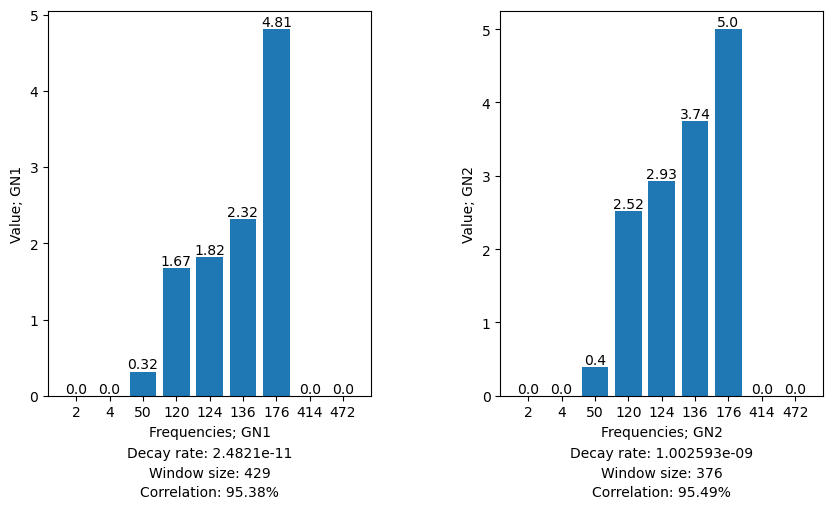

In [6]:
import pygmo as pg
from problem import SignalProcessingParams
import pickle
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for gn in range(1,3):
    params = SignalProcessingParams(group_number=gn)

    prob = pg.problem(params)
    
    pop_filename = f'pop{gn}.pkl'
    with open(pop_filename, 'rb') as p:
        pop = pickle.load(p)
        
    # Plot the diagram
    bars = axs[gn-1].bar(range(len(params.optim_ind)), pop.champion_x[:-2])
    axs[gn-1].set_xticks(range(len(params.optim_ind)))
    axs[gn-1].set_xticklabels([str(value*2) for value in params.optim_ind])   
    axs[gn-1].set_xlabel(f'Frequencies; GN{gn}')
    axs[gn-1].set_ylabel(f'Value; GN{gn}')
    axs[gn-1].text(0.5, -0.15, f'Decay rate: {round(pop.champion_x[9], 15)}', transform=axs[gn-1].transAxes, ha='center', va='center')
    axs[gn-1].text(0.5, -0.2, f'Window size: {int(pop.champion_x[10])}', transform=axs[gn-1].transAxes, ha='center', va='center')
    axs[gn-1].text(0.5, -0.25, f'Correlation: {float((1-pop.champion_f)*100):.2f}%', transform=axs[gn-1].transAxes, ha='center', va='center')

    
    # Add value labels to the top of the bars
    for bar in bars:
        height = bar.get_height()
        axs[gn-1].text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
    
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)
plt.show()

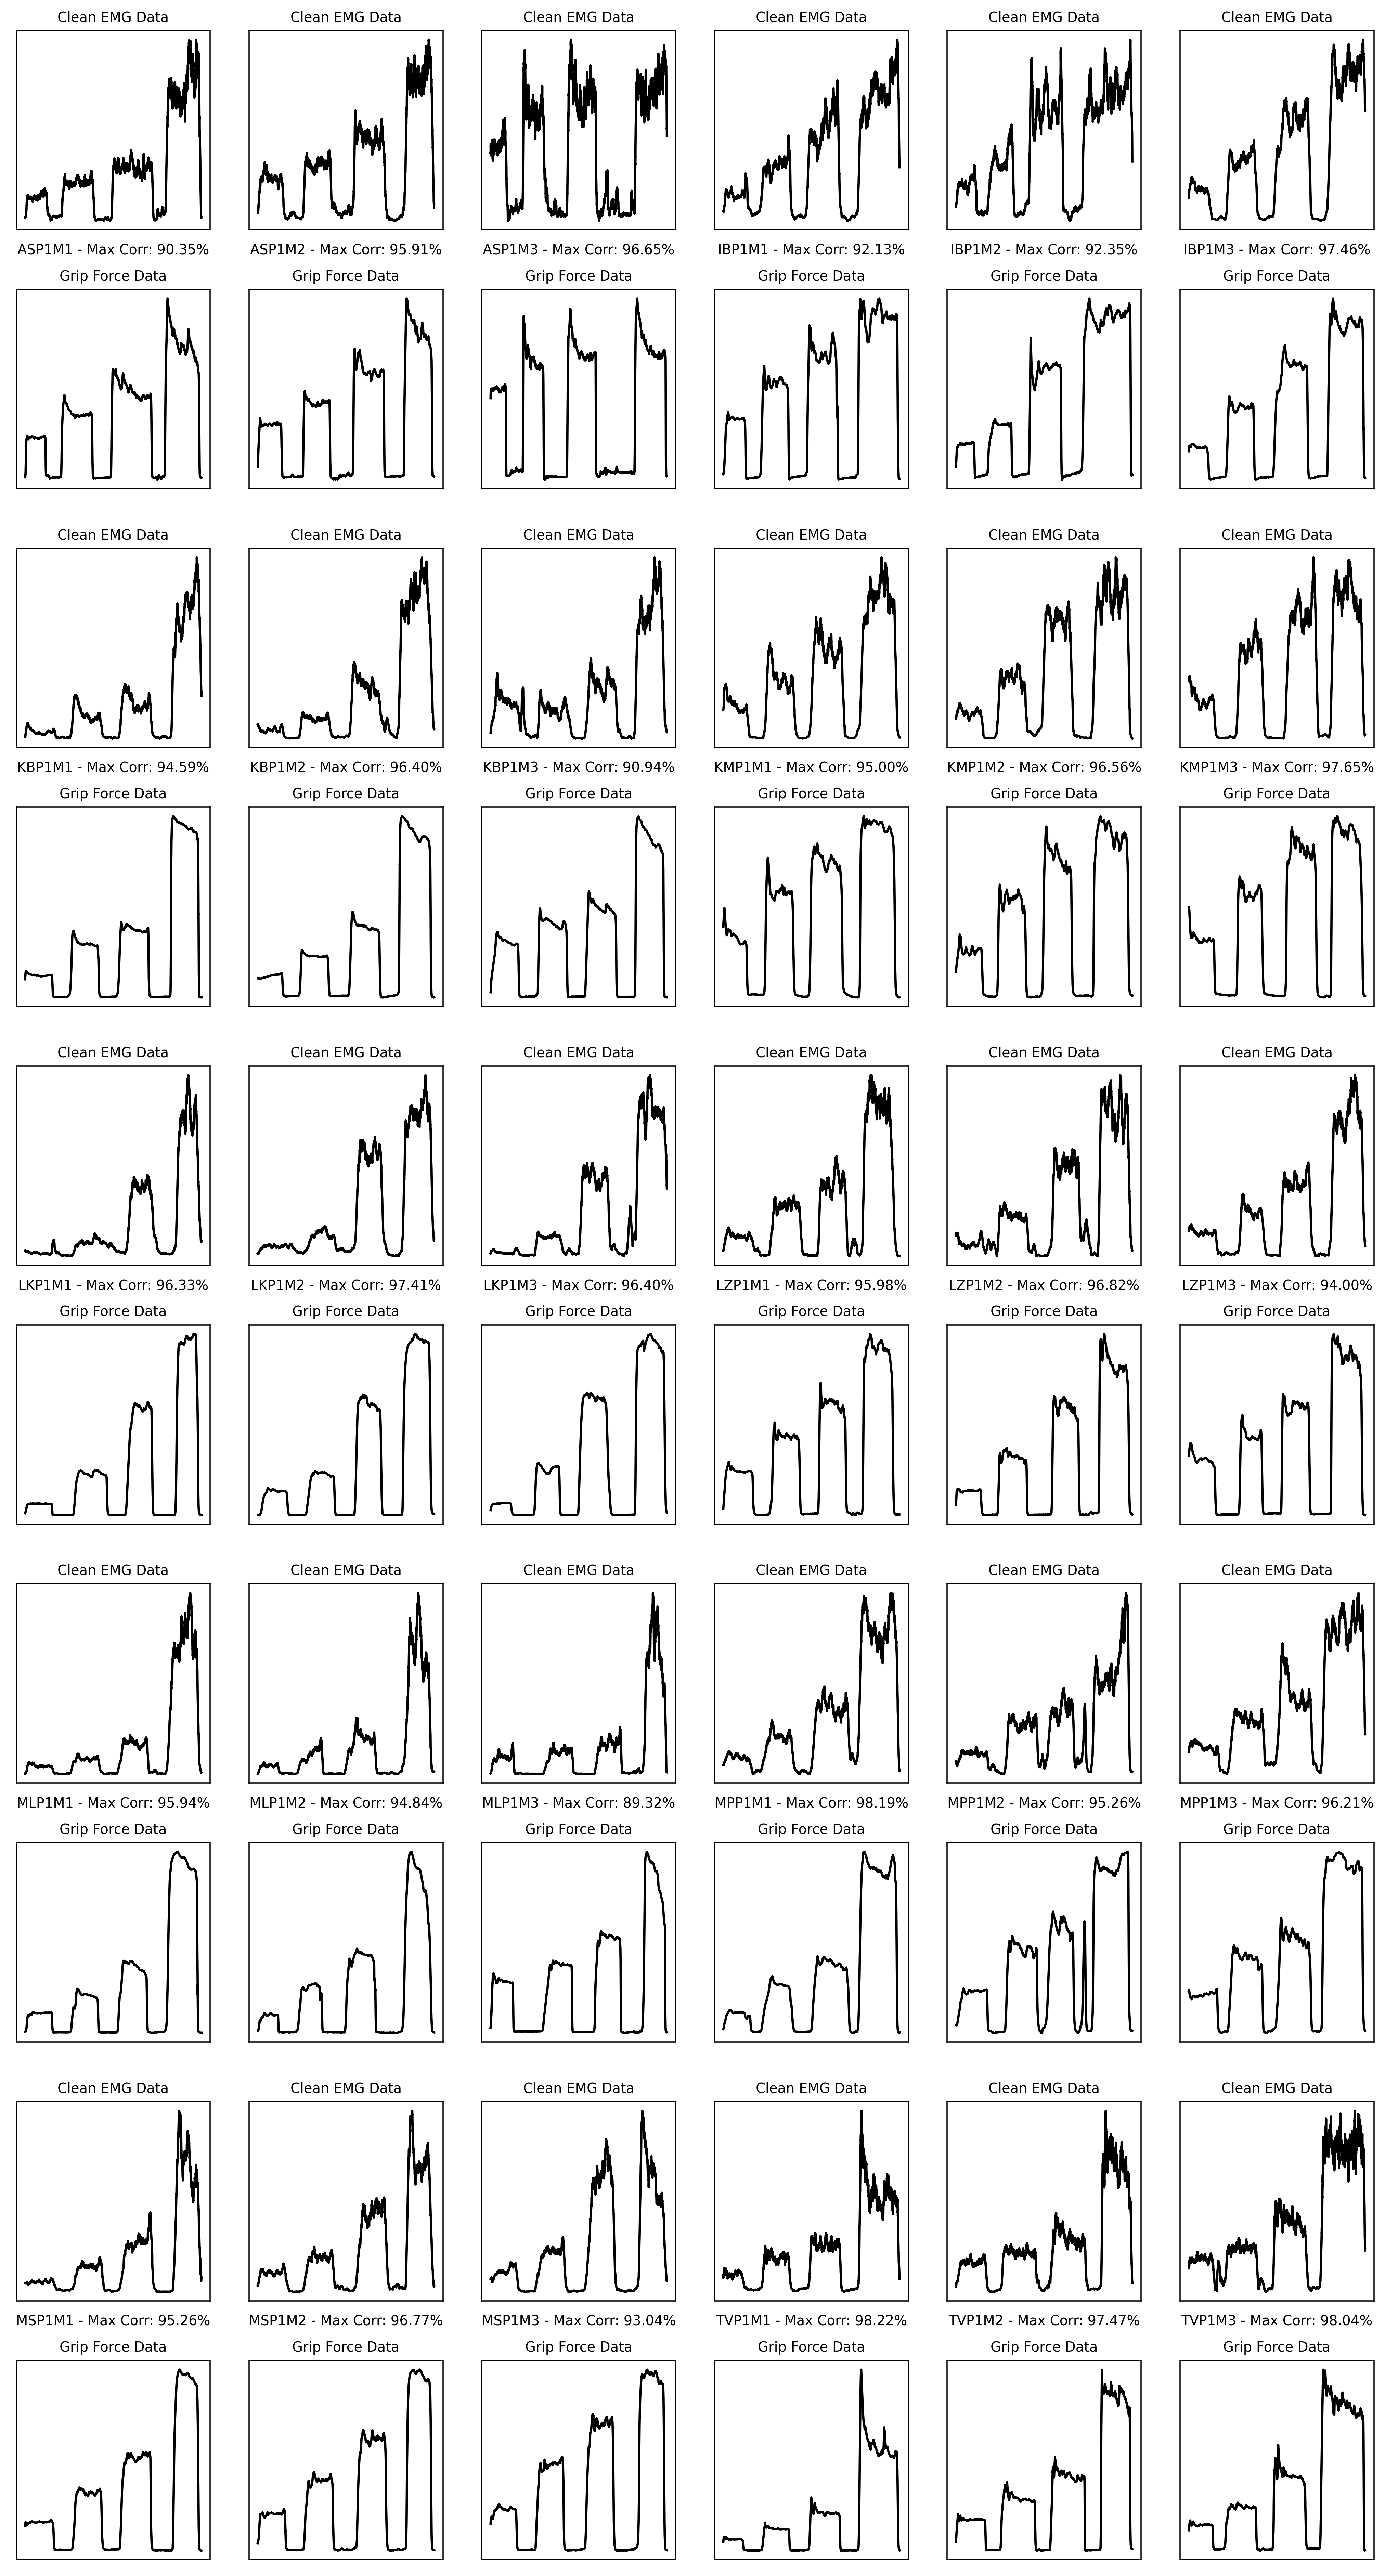

In [1]:
from problem import SignalProcessingParams
import pickle

params = SignalProcessingParams(group_number=1)

pop1_filename = 'pop1.pkl'
#pop2_filename = 'pop2.pkl'
with open(pop1_filename, 'rb') as p:
#with open(pop2_filename, 'rb') as p:
    pop = pickle.load(p)
params.plot(pop.champion_x)

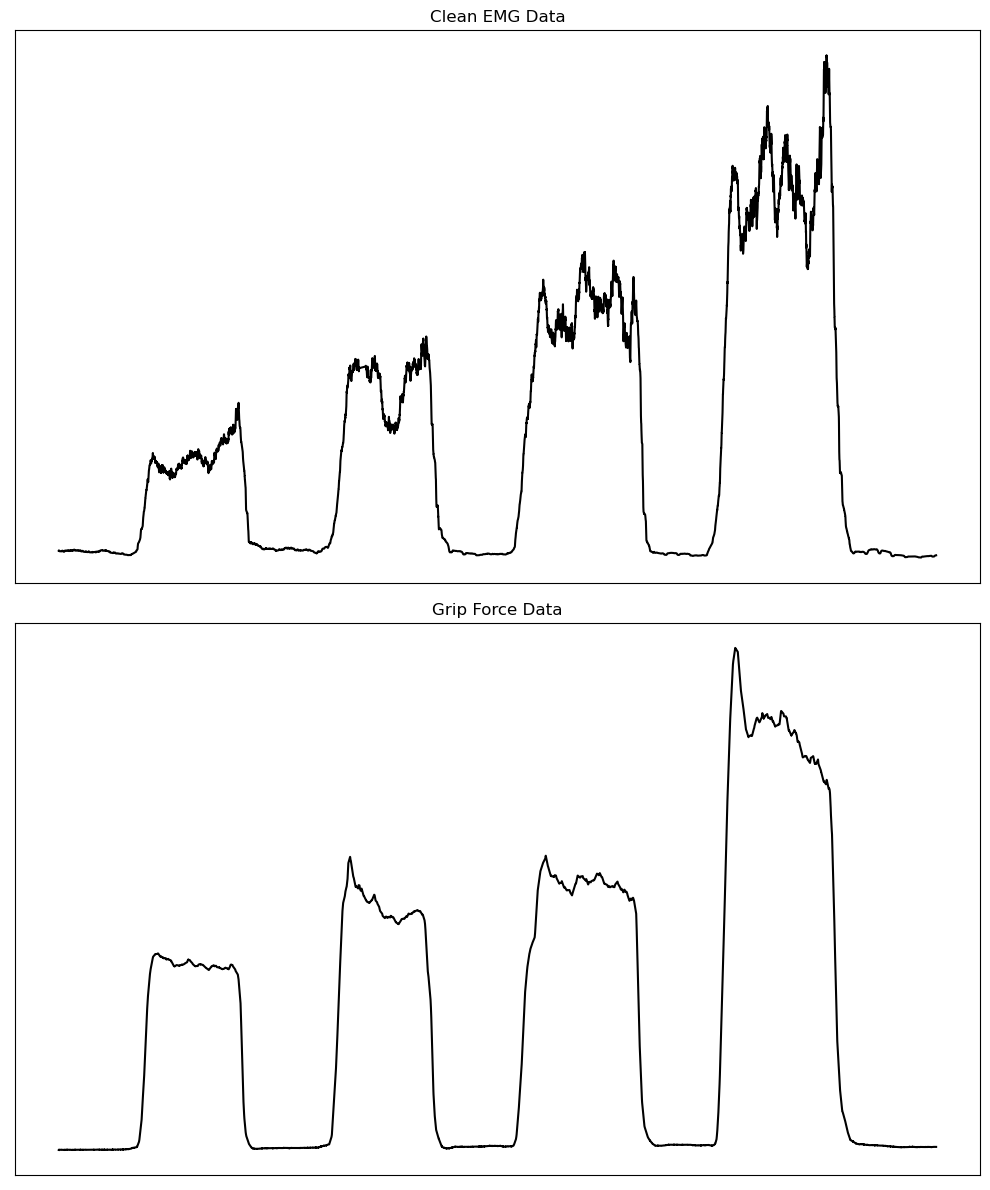

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/test_grip_emg_optimal_params.csv')
selected_data = data[['/gdx/grip_force_stream/header/seq', '/gdx/grip_force_stream/grip_force', '/shimmer0/clean_emg_stream/header/seq', '/shimmer0/clean_emg_stream/emg_ch1']]

fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

# Plot 1 - Clean EMG
clean_emg_seq = selected_data['/shimmer0/clean_emg_stream/header/seq']
clean_emg_data = selected_data['/shimmer0/clean_emg_stream/emg_ch1']

# Sort the clean EMG data points based on sequence
sorted_indices = clean_emg_seq.sort_values().index
sorted_seq = clean_emg_seq.loc[sorted_indices]
sorted_data = clean_emg_data.loc[sorted_indices]

# Plot scatter points
axes[0].scatter(sorted_seq, sorted_data, s=0, color='black')

# Connect the points with a line
axes[0].plot(sorted_seq, sorted_data, color='black')

axes[0].set_title('Clean EMG Data')

# Remove x-axis and y-axis labels and ticks
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot 2 - Grip Force
grip_seq = selected_data['/gdx/grip_force_stream/header/seq']
grip_force = selected_data['/gdx/grip_force_stream/grip_force']

# Sort the grip force data points based on sequence
sorted_indices = grip_seq.sort_values().index
sorted_seq = grip_seq.loc[sorted_indices]
sorted_force = grip_force.loc[sorted_indices]

# Plot scatter points
axes[1].scatter(sorted_seq, sorted_force, s=0, color='black')

# Connect the points with a line
axes[1].plot(sorted_seq, sorted_force, color='black')

axes[1].set_title('Grip Force Data')

# Remove x-axis and y-axis labels and ticks
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()
plt.show()

In [18]:
import os
import xlsxwriter

directory = "rbd"
filename = "rbd_v2.xlsx"
filepath = os.path.join(directory, filename)

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Remove the existing file if it exists
if os.path.exists(filepath):
    os.remove(filepath)

# Create a new workbook and add a worksheet
workbook = xlsxwriter.Workbook(filepath)
worksheet = workbook.add_worksheet()

# X1, X2, S, j
row = 2
for i in range(1, 11):
    worksheet.write(row, 0, f'X2 = {i}')
    worksheet.write(row, 1, f'S{i}')
    row += 3    
worksheet.write(0, 2, 'X1 = 1')
worksheet.write(0, 3, 'X1 = 2')
worksheet.write(1, 1, 'j')

# Correlations
worksheet.write(1, 2, 'Pozicija 1')
worksheet.write(1, 3, 'Pozicija 2')
for gn in range(1,3):
    pop_filename = f'pop{gn}.pkl'
    with open(pop_filename, 'rb') as p:
        pop = pickle.load(p)
    params = SignalProcessingParams(group_number=gn)
    for i in range (30):
        worksheet.write(i+2, gn+1, round(params.correlations(pop.champion_x)[i],6))

# mi
worksheet.write(1, 7, 'mi')
worksheet.write(1, 8, "'=")
worksheet.write(1, 9, "=AVERAGE({0}:{1})".format(xlsxwriter.utility.xl_rowcol_to_cell(2, 2),xlsxwriter.utility.xl_rowcol_to_cell(31, 3)))

# Yj
worksheet.write(1, 4, 'Yj')
start_row = 2
end_row = 4
for i in range(1, 11):
    worksheet.write(start_row, 4, "=AVERAGE({0}:{1})".format(xlsxwriter.utility.xl_rowcol_to_cell(start_row, 2),xlsxwriter.utility.xl_rowcol_to_cell(end_row, 3)))
    start_row += 3
    end_row += 3

# Bj
worksheet.write(1, 5, 'Bj')
start_row = 2
for i in range(1, 11):
    worksheet.write(start_row, 5, "={0}-{1}".format(xlsxwriter.utility.xl_rowcol_to_cell(start_row, 4),xlsxwriter.utility.xl_rowcol_to_cell(1, 9)))
    start_row += 3

# Yi
worksheet.write(32, 1, 'Yi')
for gn in range(1,3):
    worksheet.write(32, gn+1, "=AVERAGE({0}:{1})".format(xlsxwriter.utility.xl_rowcol_to_cell(2, gn+1),xlsxwriter.utility.xl_rowcol_to_cell(31, gn+1)))

# Ti
worksheet.write(33, 1, 'Ti')
worksheet.write(33, 2, "={0}-{1}".format(xlsxwriter.utility.xl_rowcol_to_cell(32, 2),xlsxwriter.utility.xl_rowcol_to_cell(1, 9)))
worksheet.write(33, 3, "={0}-{1}".format(xlsxwriter.utility.xl_rowcol_to_cell(32, 3),xlsxwriter.utility.xl_rowcol_to_cell(1, 9)))

# Yij  
worksheet.write(3, 9, 'Yij')
worksheet.write(3, 10, 'i')
worksheet.write(4, 9, 'j')
start_col = 10
for i in range(1,3):
    worksheet.write(4, start_col, i)
    start_col += 1
    start_row = 5
    start_row_Bj = 2
    for j in range(1,11):
        worksheet.write(start_row, 9, j)
        worksheet.write(start_row, i+9, "={0}+{1}+{2}".format(xlsxwriter.utility.xl_rowcol_to_cell(start_row_Bj, 5),xlsxwriter.utility.xl_rowcol_to_cell(1, 9),xlsxwriter.utility.xl_rowcol_to_cell(33, i+1)))
        start_row += 1 
        start_row_Bj += 3
    worksheet.write(16, i+9, "=AVERAGE({0}:{1})".format(xlsxwriter.utility.xl_rowcol_to_cell(5, i+9),xlsxwriter.utility.xl_rowcol_to_cell(14, i+9)))

# Close the workbook
workbook.close()

print("Excel file created successfully.")

# Reopen the workbook
os.startfile(filepath)

Excel file created successfully.


In [2]:
import pygmo as pg
from problem import SignalProcessingParams
prob = pg.problem(SignalProcessingParams(group_number=1))
print(prob)

Problem name: Optimize EMG signal processing parameters to cross-corelate with grip force
	C++ class name: class pybind11::object

	Global dimension:			11
	Integer dimension:			1
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0, 0, 0, 0, ... ]
	Upper bounds: [0, 0, 1, 3, 3, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

Extra info:
	Sampling rate: 992.969696969697 Hz
	FFT window size: 496 samples
	FFT resolution: 2.0019550342130987 Hz



In [3]:
import pygmo as pg
algo = pg.algorithm(pg.sade(gen=1000, variant=1, variant_adptv=1, xtol=1e-8))
print(algo)

Algorithm name: saDE: Self-adaptive Differential Evolution [stochastic]
	C++ class name: class pagmo::sade

	Thread safety: basic

Extra info:
	Generations: 1000
	Variant: 1
	Self adaptation variant: 1
	Stopping xtol: 1e-08
	Stopping ftol: 1e-06
	Memory: false
	Verbosity: 0
	Seed: 317929232


In [4]:
import pygmo as pg
from problem import SignalProcessingParams
prob = pg.problem(SignalProcessingParams(group_number=1))
pop = pg.population(prob, size=50)
print(pop)

Problem name: Optimize EMG signal processing parameters to cross-corelate with grip force
	C++ class name: class pybind11::object

	Global dimension:			11
	Integer dimension:			1
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0, 0, 0, 0, ... ]
	Upper bounds: [0, 0, 1, 3, 3, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 50

	Thread safety: none

Extra info:
	Sampling rate: 992.969696969697 Hz
	FFT window size: 496 samples
	FFT resolution: 2.0019550342130987 Hz

Population size: 50

List of individuals: 
#0:
	ID:			10861824089482369897
	Decision vector:	[0, 0, 0.936181, 2.1873, 0.665399, ... ]
	Fitness vector:		[0.0480153]
#1:
	ID:			14628384823313377858
	Decision vector:	[0, 0, 0.949582, 0.562674, 2.02568, ... ]
	Fitness vector:		[0.0483142]
#2:


In [5]:
import pygmo as pg
from problem import SignalProcessingParams
# The problem
prob = pg.problem(SignalProcessingParams(group_number=1))
# The initial population
pop = pg.population(prob, size=50)
# The algorithm (a self-adaptive form of Differential Evolution)
algo = pg.algorithm(pg.sade(gen=1000, variant=1, variant_adptv=1, xtol=1e-8))
# The actual optimization process
pop = algo.evolve(pop)
# Getting the best individual in the population
best_fitness = pop.get_f()[pop.best_idx()]
print(best_fitness)


[0.04616839]
